In [1]:
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE


# import CSV File

In [2]:
df = pd.read_csv('/content/telco_data.csv')

# Exploratory Data Analysis

In [3]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
df.shape

(7043, 21)

In [5]:
df1 = df.isnull().sum()

In [6]:
df1

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
df.shape

(7043, 21)

In [10]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [11]:
df['tenure'].dtype

dtype('int64')

In [12]:
df.duplicated().sum()

0

In [13]:
df['TotalCharges']=pd.to_numeric(df.TotalCharges, errors='coerce')

In [14]:
df['TotalCharges'].isnull().sum()

11

In [15]:
# Calculate the mean of the column (excluding null values)
mean_value = df['TotalCharges'].mean()

# Fill null values with the mean
df['TotalCharges'].fillna(mean_value, inplace=True)

In [16]:
df['TotalCharges'].isnull().sum()

0

In [17]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
# Drop Cusomer ID column

df=df.drop('customerID',axis=1)

In [19]:
# Filter the data for rows where tenure is zero
zero_tenure_data = df[df['tenure'] == 0]

zero_tenure_data[['tenure','Churn']]

,tenure,Churn
488,0,No
753,0,No
936,0,No
1082,0,No
1340,0,No
3331,0,No
3826,0,No
4380,0,No
5218,0,No
6670,0,No


In [20]:
#droping rows with tenure 0

df = df[df['tenure'] != 0]

In [21]:
# Group the data by 'gender' and calculate churn statistics
churn_stats_by_gender = df.groupby('gender')['Churn'].value_counts()

# Print the churn statistics by gender
print(churn_stats_by_gender)

gender  Churn
Female  No       2544
        Yes       939
Male    No       2619
        Yes       930
Name: Churn, dtype: int64


In [22]:
#To convert the value "no internet service" to "No" in the "PaymentMethod" column

df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')


# Visual Representation of diffrent Fetures with our target label Churn

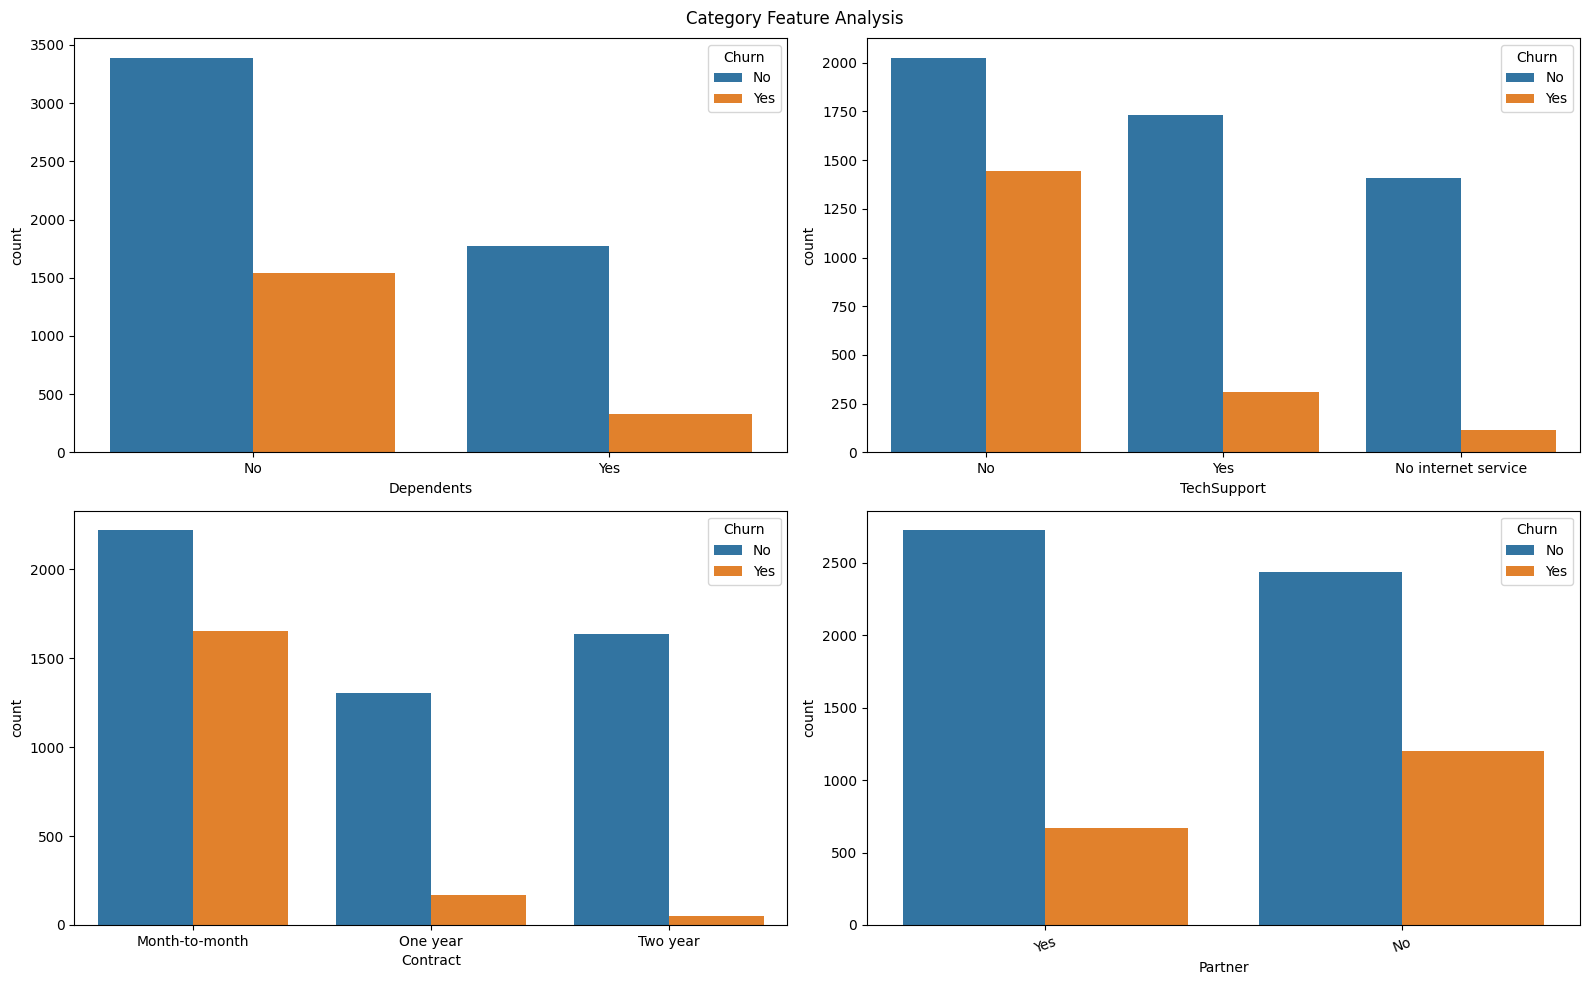

In [53]:
#Sub plots

import seaborn as sns
import matplotlib.pyplot as plt

col_sel = ['Dependents', 'TechSupport', 'Contract', 'Partner']
idx = 0

fig, ax = plt.subplots(2, 2, figsize=(16, 10))

for row in range(2):
    for col in range(2):
        sns.countplot(
            data=df,  # Replace 'data' with your actual DataFrame variable
            ax=ax[row, col],
            x=col_sel[idx],
            hue='Churn'
        )
        idx += 1

ax[1, 1].tick_params(axis='x', labelrotation=20)
plt.suptitle('Category Feature Analysis')

plt.tight_layout()
plt.show()


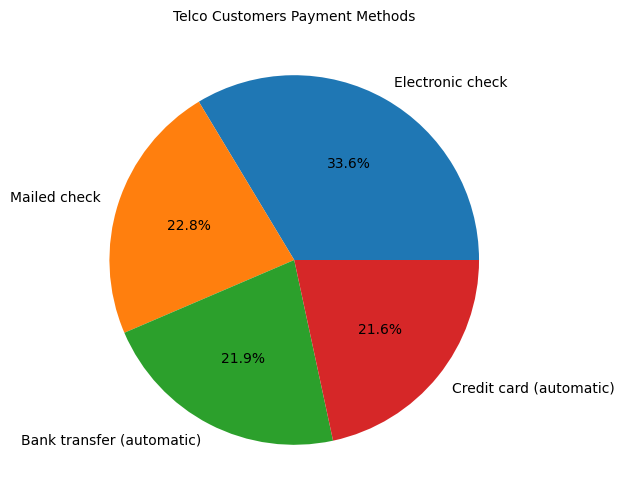

In [52]:
#Customer Data

plt.figure(figsize=(6,6))
plt.pie(df.PaymentMethod.value_counts(), labels=df.PaymentMethod.value_counts().index, autopct='%1.1f%%')
plt.title("Telco Customers Payment Methods", fontsize=10)
# show the plot
plt.show()

<ipython-input-25-098da6e099ac>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
<ipython-input-25-098da6e099ac>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],


Text(0.5, 1.0, 'Distribution of total charges by churn')

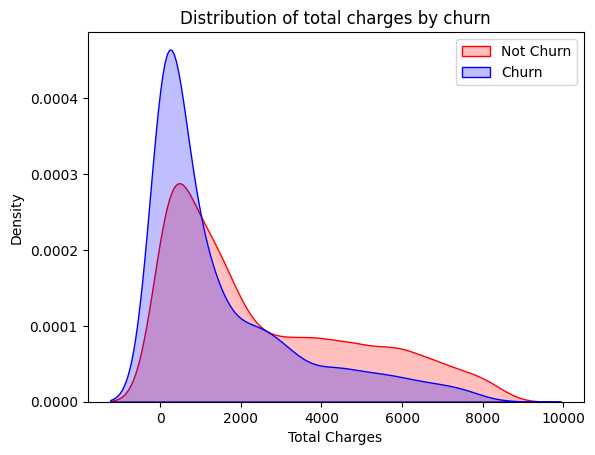

In [25]:
#kdeplot

ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

# Heat MAp

In [26]:
# Creating a copy of the dataset for label encoding
# cols variable storing the column names of the object data type columns
cols=df.select_dtypes(include=object).columns
# Importing the LabelEncoder class from sklearn.preprocessing module
from sklearn.preprocessing import LabelEncoder
# Creating a copy of the dataset
label_encoded_train=df.copy()
# Creating an instance of LabelEncoder
le=LabelEncoder()
# Iterating over each column in the 'cols' variable
for i in cols:
    # Applying label encoding to the selected column
    # The original column is replaced with the encoded values
    label_encoded_train[i]=le.fit_transform(label_encoded_train[i])

In [27]:
# Creating copy the label encoded data in data_train and displaying it
data_train=label_encoded_train.copy()
data_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,0,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


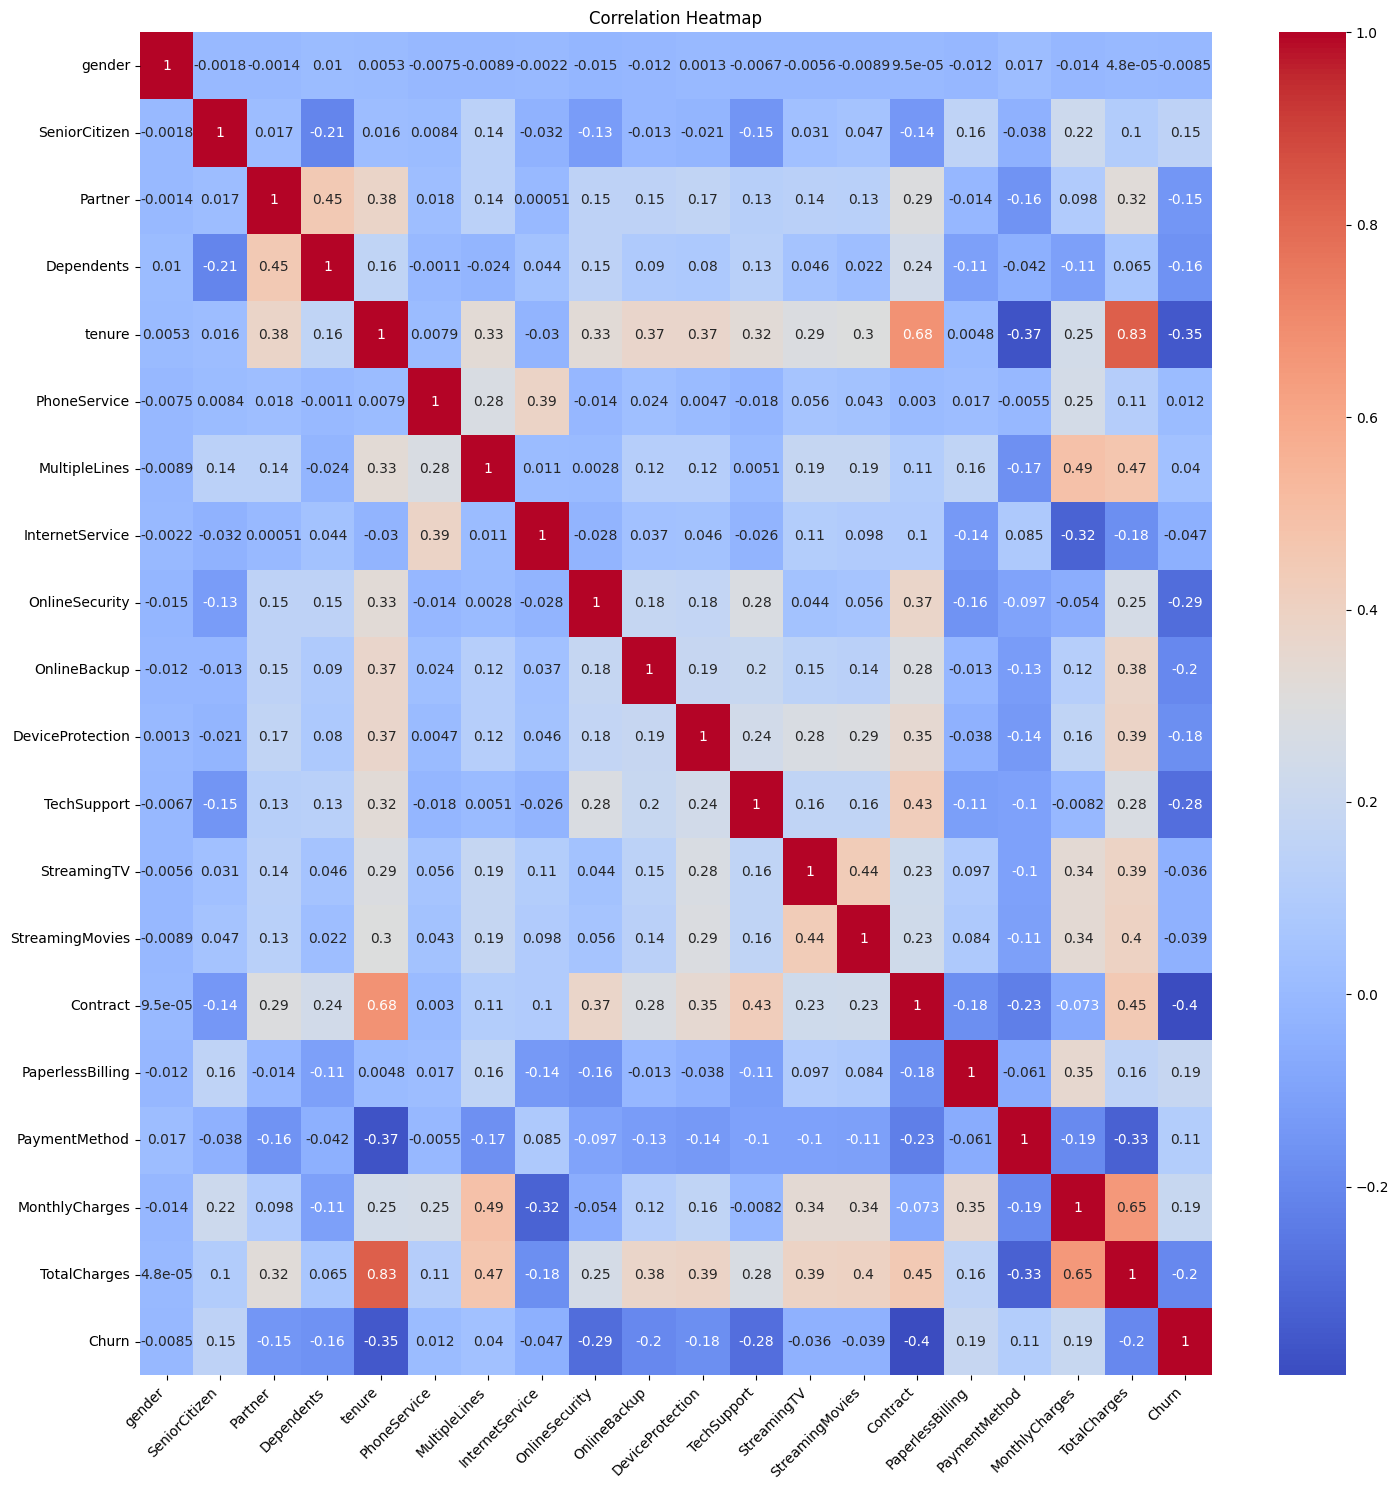

In [28]:
# Calculate the correlation matrix
corr_matrix = data_train.corr()

# Create the heatmap
plt.figure(figsize=(15, 15))  # Adjust the figure size to provide more space
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Rotate the x-axis labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')

# Customize the plot
heatmap.set_title('Correlation Heatmap')

# Display the plot
plt.tight_layout()  # Adjust the spacing between plot elements
plt.show()


# Applying Random Forest

In [29]:
data_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,0,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,1,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,0,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,1,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [30]:
x=data_train.drop('Churn',axis=1)
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,0,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,0,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,1,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,0,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,1,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [31]:
y=data_train['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [32]:
# Train Test Split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [33]:
# Decision Tree Classifier

model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [34]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [35]:
y_pred=model_dt.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [36]:
model_dt.score(x_test,y_test)

0.7775408670931059

In [37]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86      1014
           1       0.69      0.37      0.48       393

    accuracy                           0.78      1407
   macro avg       0.74      0.65      0.67      1407
weighted avg       0.76      0.78      0.75      1407



In [38]:
sm = SMOTE()
X_resampled1, y_resampled1 = sm.fit_resample(x,y)

In [39]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)

In [40]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [41]:
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [42]:
yr_predict1 = model_rf_smote.predict(xr_test1)

In [43]:
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)

In [44]:
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))

0.8170377541142304
              precision    recall  f1-score   support

           0       0.86      0.77      0.81      1048
           1       0.78      0.87      0.82      1018

    accuracy                           0.82      2066
   macro avg       0.82      0.82      0.82      2066
weighted avg       0.82      0.82      0.82      2066



In [45]:
print(metrics.confusion_matrix(yr_test1, yr_predict1))

[[804 244]
 [134 884]]



# Confusion Matrix

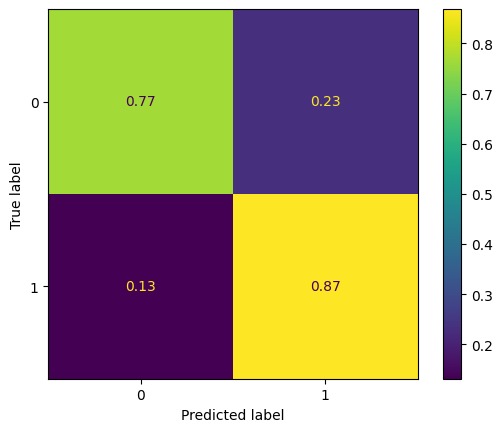

Confusion matrix:
Predicted     0    1   All
True                      
0           950   64  1014
1           249  144   393
All        1199  208  1407
Accuracy: 0.8170377541142304
Precision: 0.8209487127429085
Recall: 0.8170377541142304
F1 Score: 0.8166599773929797
Accuracy: 81.70%


In [71]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

# Generate a confusion matrix and calculate the metrics
cm = confusion_matrix(yr_test1, yr_predict1)
accuracy = accuracy_score(yr_test1, yr_predict1)
precision = precision_score(yr_test1, yr_predict1, average='weighted')
recall = recall_score(yr_test1, yr_predict1, average='weighted')
f1 = f1_score(yr_test1, yr_predict1, average='weighted')

cm = confusion_matrix(yr_test1, yr_predict1, normalize = 'true')
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

# Print the confusion matrix and metrics
print("Confusion matrix:")
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
# Print the accuracy of the model
print("Accuracy: {:.2f}%".format(accuracy*100))



# Getting Important Features After implementing model

In [46]:
feature_importances = model_rf_smote.feature_importances_
feature_importances

array([0.00891384, 0.00093535, 0.02645466, 0.03179441, 0.09333843,
       0.0011697 , 0.00171405, 0.04687704, 0.15756618, 0.03107553,
       0.02565151, 0.16592072, 0.00486672, 0.00450902, 0.2621883 ,
       0.00195427, 0.01650751, 0.05949815, 0.05906461])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'gender'),
  Text(1, 0, 'SeniorCitizen'),
  Text(2, 0, 'Partner'),
  Text(3, 0, 'Dependents'),
  Text(4, 0, 'tenure'),
  Text(5, 0, 'PhoneService'),
  Text(6, 0, 'MultipleLines'),
  Text(7, 0, 'InternetService'),
  Text(8, 0, 'OnlineSecurity'),
  Text(9, 0, 'OnlineBackup'),
  Text(10, 0, 'DeviceProtection'),
  Text(11, 0, 'TechSupport'),
  Text(12, 0, 'StreamingTV'),
  Text(13, 0, 'StreamingMovies'),
  Text(14, 0, 'Contract'),
  Text(15, 0, 'PaperlessBilling'),
  Text(16, 0, 'PaymentMethod'),
  Text(17, 0, 'MonthlyCharges'),
  Text(18, 0, 'TotalCharges')])

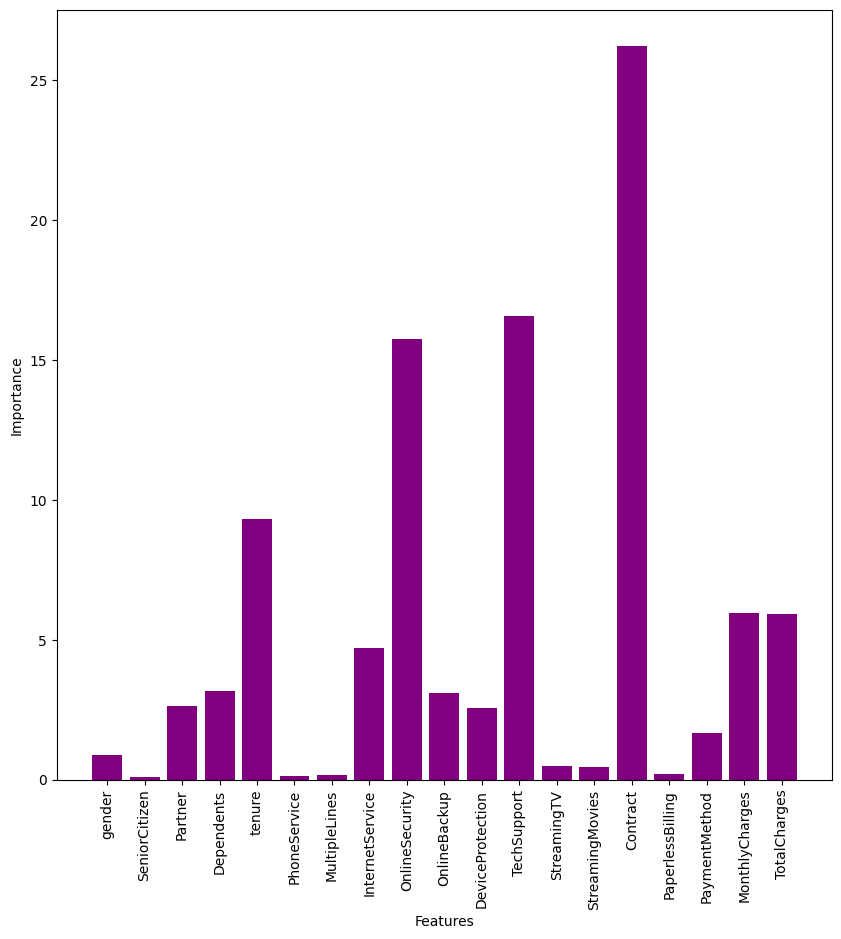

In [47]:
plt.figure(figsize=(10,10))
plt.bar(x_train.columns, feature_importances*100, color='purple' )
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)